<a href="https://colab.research.google.com/github/Aderine2006/Data-Analysics-using-sample-data/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Columns in CSV: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
📦 Product column: PRODUCTCODE
💰 Sales column: SALES
📆 Month column: MONTH_ID
📄 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 n

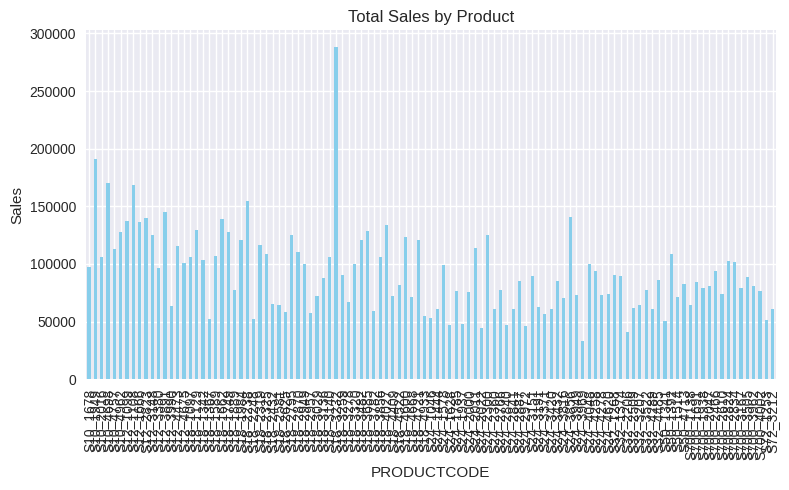

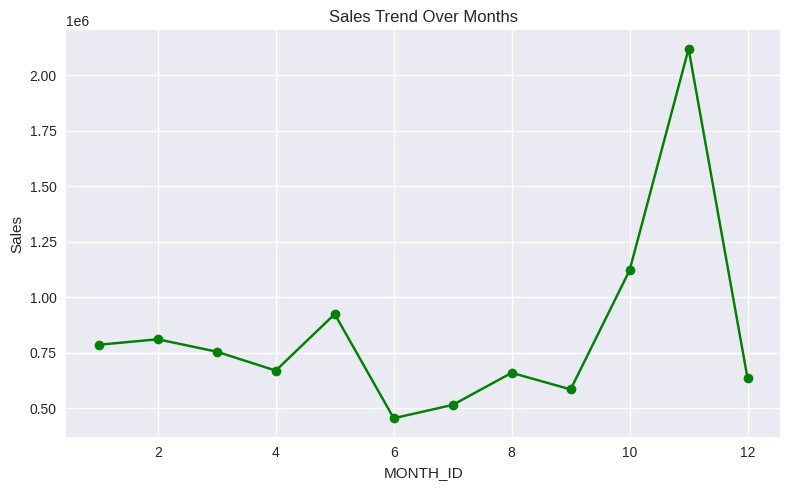

🔍 Insights:
📌 Top Selling Product: S18_3232 with 288245.42 sales
📌 Highest Sales Month: 11 with 2118885.67 sales


In [2]:
# 📌 Task 5 - Data Analysis on CSV Files
# Objective: Analyze sales data using Pandas

# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV with encoding fix & clean column names
# file_path = r"D:\ELEVATE LABS\TASK 5\sales_data_sample.csv" # Original local path
# Update file_path to the location where the file is uploaded in Colab, e.g., /content/
file_path = "/sales_data_sample.csv" # Example Colab path

try:
    df = pd.read_csv(file_path, encoding="latin1")
    df.columns = df.columns.str.strip()  # Remove extra spaces

    print("✅ Columns in CSV:", list(df.columns))

    # 2️⃣ Auto-detect required columns
    product_col = None
    sales_col = None
    month_col = None

    for col in df.columns:
        if "product" in col.lower():
            product_col = col
        if "sale" in col.lower():
            sales_col = col
        if "month" in col.lower():
            month_col = col

    if not product_col or not sales_col:
        raise ValueError("❌ Could not find Product/Sales columns in CSV.")

    print(f"📦 Product column: {product_col}")
    print(f"💰 Sales column: {sales_col}")
    if month_col:
        print(f"📆 Month column: {month_col}")
    else:
        print("⚠ No Month column found, skipping month-based analysis.")

    # 3️⃣ Explore the Data
    print("📄 Data Info:")
    print(df.info())

    print("\n📊 Summary Statistics:")
    print(df.describe())

    print("\n❓ Missing Values:")
    print(df.isnull().sum())

    # 4️⃣ Group and Summarize Data
    sales_by_product = df.groupby(product_col)[sales_col].sum()
    print("\n💰 Total Sales by Product:")
    print(sales_by_product)

    if month_col:
        sales_by_month = df.groupby(month_col)[sales_col].sum()
        print("\n📆 Total Sales by Month:")
        print(sales_by_month)

    # 5️⃣ Visualization
    plt.style.use('seaborn-v0_8')
    plt.rcParams['figure.figsize'] = (8, 5)

    # Bar chart - Sales by Product
    sales_by_product.plot(kind='bar', color='skyblue', title='Total Sales by Product')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()

    # Line chart - Sales by Month (if month column exists)
    if month_col:
        sales_by_month.plot(kind='line', marker='o', color='green', title='Sales Trend Over Months')
        plt.ylabel('Sales')
        plt.tight_layout()
        plt.show()

    # 6️⃣ Insights
    print("🔍 Insights:")
    print(f"📌 Top Selling Product: {sales_by_product.idxmax()} with {sales_by_product.max()} sales")
    if month_col:
        print(f"📌 Highest Sales Month: {sales_by_month.idxmax()} with {sales_by_month.max()} sales")

except FileNotFoundError:
    print(f"❌ Error: The file was not found at {file_path}.")
    print("Please upload the 'sales_data_sample.csv' file to your Colab environment and ensure the file_path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")